Task-3: Develop an image classification model to distinguish between images of cats and dogs using data science techniques in Python.

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 

In [3]:
import os

base_dir = 'c:/Users/Arjun Singh Rajput/OneDrive/Desktop/BharatIntern/Tasks/Cats and Dogs'
cat_dir = os.path.join(base_dir, 'Cat')
dog_dir = os.path.join(base_dir, 'Dog')

print("Cat directory exists:", os.path.isdir(cat_dir)) 
print("Dog directory exists:", os.path.isdir(dog_dir))

print("First 5 cat images:", os.listdir(cat_dir)[:5])
print("First 5 dog images:", os.listdir(dog_dir)[:5])


Cat directory exists: True
Dog directory exists: True
First 5 cat images: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']
First 5 dog images: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 19932 images belonging to 2 classes.
Found 4981 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\Arjun Singh Rajput\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs = 5,
    validation_data=validation_generator
) 

Epoch 1/5


c:\Users\Arjun Singh Rajput\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


211/622 ━━━━━━━━━━━━━━━━━━━━ 3:44 547ms/step - accuracy: 0.5174 - loss: 0.8230

c:\Users\Arjun Singh Rajput\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


482/622 ━━━━━━━━━━━━━━━━━━━━ 1:27 621ms/step - accuracy: 0.5523 - loss: 0.7482

In [17]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {validation_accuracy * 100:.2f}%')
print(f'Validation loss: {validation_loss:.4f}')

156/156 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.7954 - loss: 0.4411
Validation accuracy: 78.70%
Validation loss: 0.4484


First 5 cat images: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']
First 5 dog images: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']

Predictions for Cat images (first set):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: 0.jpg, Prediction: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: 1.jpg, Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: 10.jpg, Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: 100.jpg, Prediction: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: 1000.jpg, Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: 10000.jpg, Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: 10001.jpg, Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: 10002.jpg, Prediction: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: 10003.jpg, Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: 10004.jpg, Prediction: Cat

Predictions for Dog images (first set):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: 0.jpg, Prediction: Dog


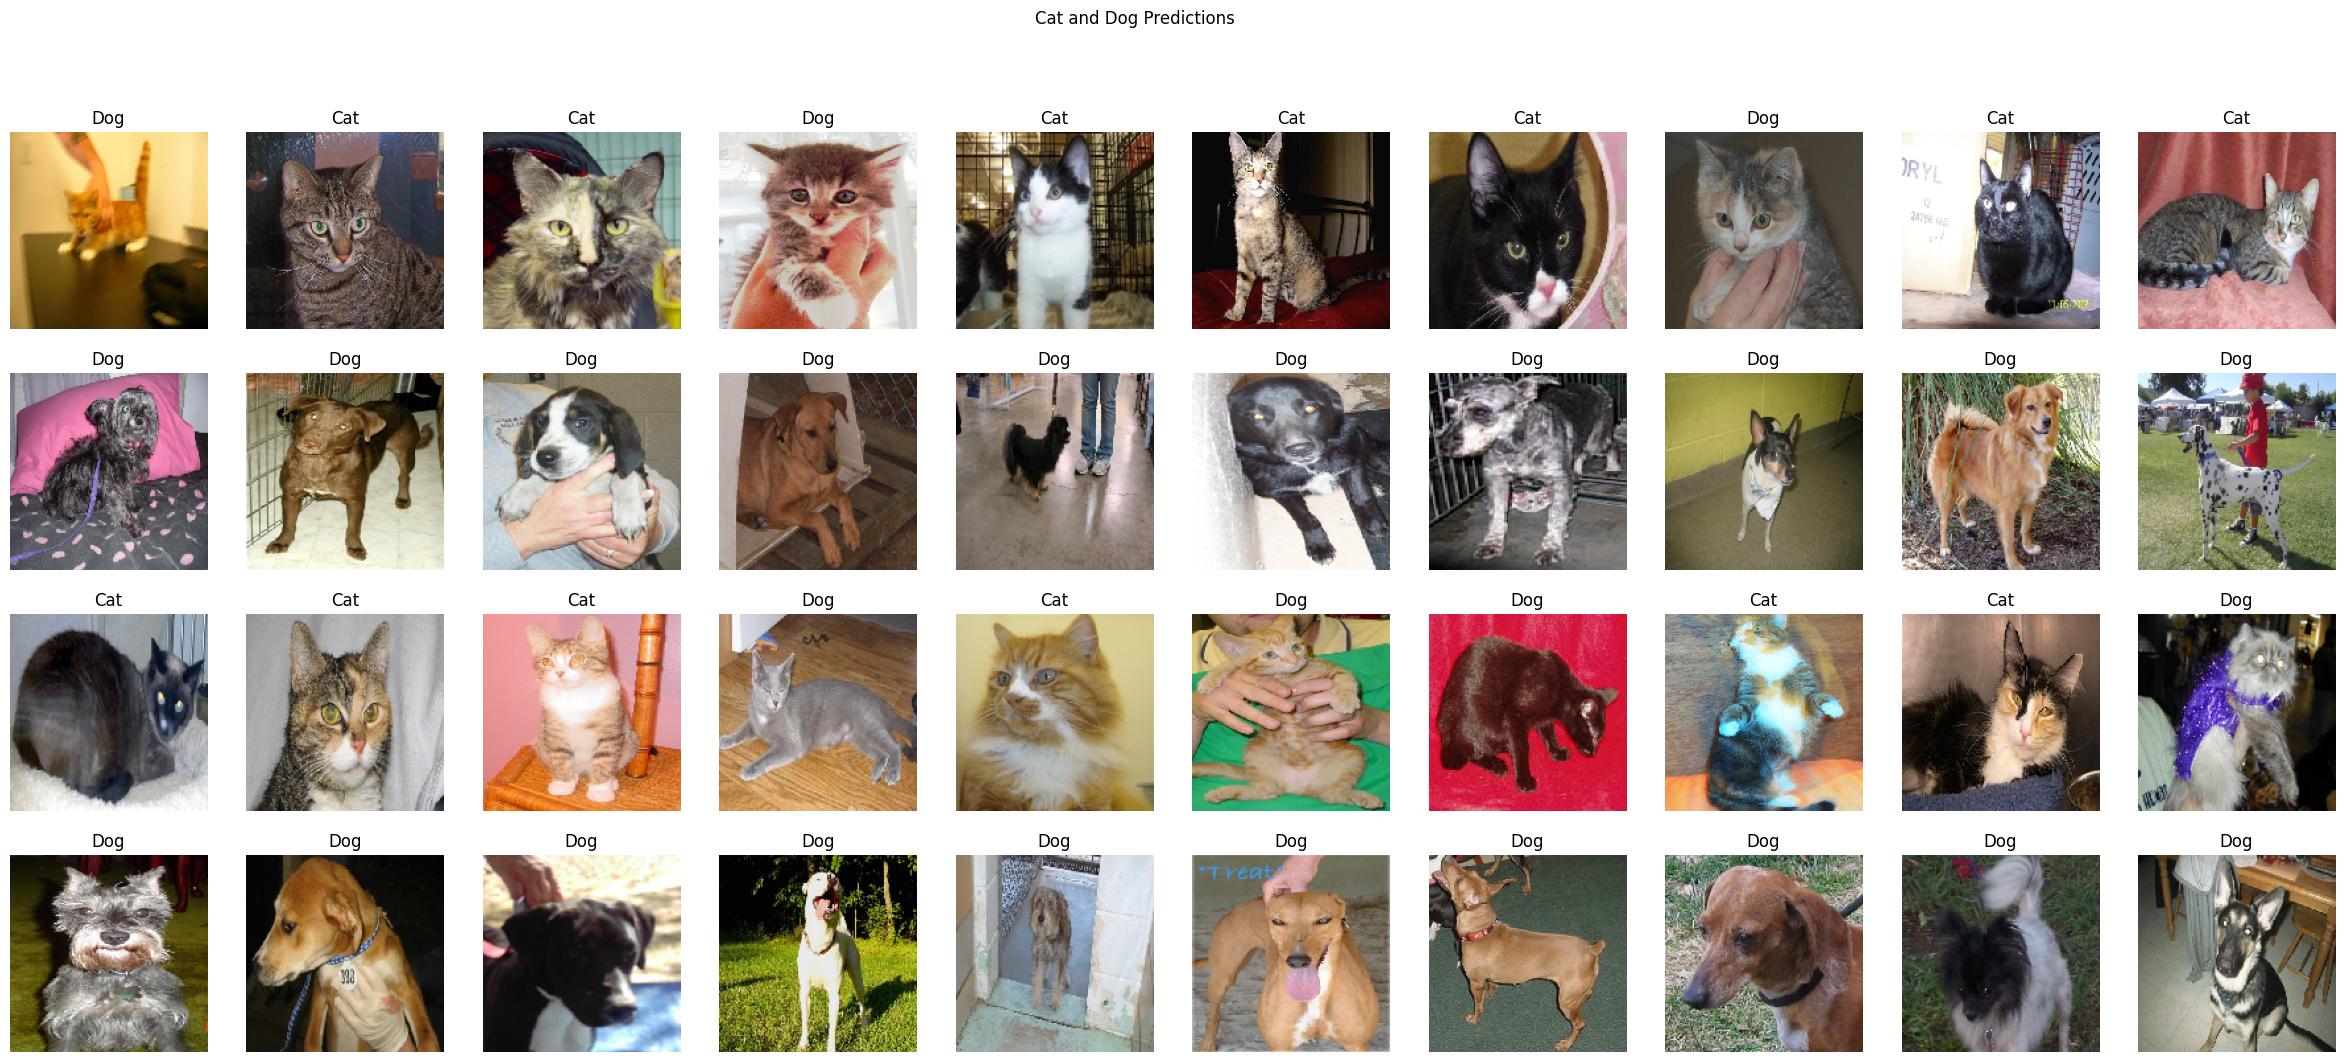

In [32]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0
    
    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()
        
    return img_tensor

base_dir = 'c:/Users/Arjun Singh Rajput/OneDrive/Desktop/BharatIntern/Tasks/Cats and Dogs'
cat_dir = os.path.join(base_dir, 'Cat')
dog_dir = os.path.join(base_dir, 'Dog')

cat_images = os.listdir(cat_dir)
dog_images = os.listdir(dog_dir)

print("First 5 cat images:", cat_images[:5])
print("First 5 dog images:", dog_images[:5])

num_predictions = 10  

fig, axes = plt.subplots(4, num_predictions, figsize=(3 * num_predictions, 12))  
fig.suptitle('Cat and Dog Predictions')

print("\nPredictions for Cat images (first set):")
for i in range(min(num_predictions, len(cat_images))):
    img_path = os.path.join(cat_dir, cat_images[i])
    new_image = load_image(img_path)
    pred = model.predict(new_image)
    prediction = 'Dog' if pred[0][0] > 0.5 else 'Cat'
    print(f"Image: {cat_images[i]}, Prediction: {prediction}")
    
    img = image.load_img(img_path, target_size=(150, 150))
    axes[0, i].imshow(img)
    axes[0, i].set_title(prediction)
    axes[0, i].axis('off')

print("\nPredictions for Dog images (first set):")
for i in range(min(num_predictions, len(dog_images))):
    img_path = os.path.join(dog_dir, dog_images[i])
    new_image = load_image(img_path)
    pred = model.predict(new_image)
    prediction = 'Dog' if pred[0][0] > 0.5 else 'Cat'
    print(f"Image: {dog_images[i]}, Prediction: {prediction}")
    
    img = image.load_img(img_path, target_size=(150, 150))
    axes[1, i].imshow(img)
    axes[1, i].set_title(prediction)
    axes[1, i].axis('off')

print("\nPredictions for Cat images (second set):")
for i in range(num_predictions, 2 * num_predictions):
    if i >= len(cat_images):
        break
    img_path = os.path.join(cat_dir, cat_images[i])
    new_image = load_image(img_path)
    pred = model.predict(new_image)
    prediction = 'Dog' if pred[0][0] > 0.5 else 'Cat'
    print(f"Image: {cat_images[i]}, Prediction: {prediction}")
    
    img = image.load_img(img_path, target_size=(150, 150))
    axes[2, i - num_predictions].imshow(img)
    axes[2, i - num_predictions].set_title(prediction)
    axes[2, i - num_predictions].axis('off')

print("\nPredictions for Dog images (second set):")
for i in range(num_predictions, 2 * num_predictions):
    if i >= len(dog_images):
        break
    img_path = os.path.join(dog_dir, dog_images[i])
    new_image = load_image(img_path)
    pred = model.predict(new_image)
    prediction = 'Dog' if pred[0][0] > 0.5 else 'Cat'
    print(f"Image: {dog_images[i]}, Prediction: {prediction}")
    
    img = image.load_img(img_path, target_size=(150, 150))
    axes[3, i - num_predictions].imshow(img)
    axes[3, i - num_predictions].set_title(prediction)
    axes[3, i - num_predictions].axis('off')

plt.show()
